In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting time series data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maxim75/data-visualization/blob/master/notebooks/Plotting%20time%20series%20data.ipynb)

## Get random date data

In [2]:
def get_random_dates(start_date, days, size):
    dates = []
    for idx in range(0,size):
        start_date = np.datetime64('2021-01-01')
        days_to_add = np.arange(0, days)
        random_date = np.datetime64(start_date) + np.random.choice(days_to_add)
        dates.append(random_date)
    return dates

random_dates = get_random_dates("2021-10-01", 30, 20)
df = pd.DataFrame({ "Date": random_dates}).groupby(by="Date").size().to_frame("count")
df.head(5)

,count
Date,
2021-01-02,2
2021-01-04,1
2021-01-05,2
2021-01-08,1
2021-01-11,1


## Reindex date range

In [3]:
idx = pd.date_range(df.index.min(), df.index.max())
df_reindexed = df.reindex(idx, fill_value=0)

## Draw graph

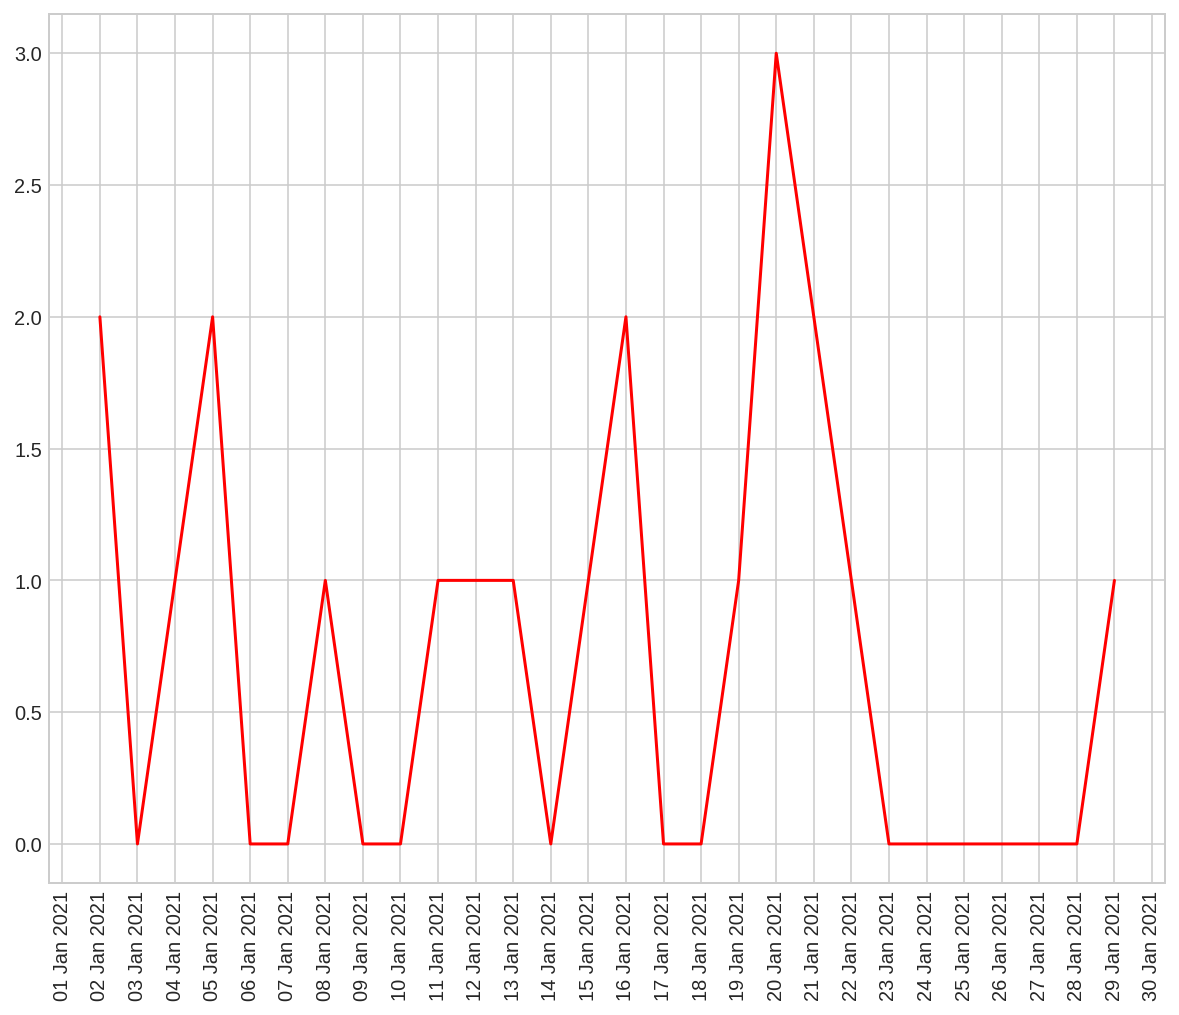

In [4]:
%config InlineBackend.figure_format = 'retina'

plt.style.use("seaborn-whitegrid")

fig = plt.figure(figsize=(10, 8))
ax = plt.axes()

ax.plot("index", "count", data=df_reindexed.reset_index(), c="red")
date_form = mdates.DateFormatter("%d %b %Y") # month and year only
fmt_half_year = mdates.DayLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
ax.xaxis.set_major_formatter(date_form)
ax.tick_params('x', labelrotation=90)